# EDA

Load Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

Load Dataset

In [4]:
df = pd.read_csv('/Users/tavneetbahia/Documents/GitHub/Coding_assessment_Naimuri/covid_19_data_2020.csv')
df.head()

,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [38]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], format='mixed')
df.head()

,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered,State_missing
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,False
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,False
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,False
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,False
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,False


Look into descriptive statistics of dataset

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98252 entries, 0 to 98251
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationID    98252 non-null  int64         
 1   ObservationDate  98252 non-null  datetime64[ns]
 2   State            67096 non-null  object        
 3   Country          98252 non-null  object        
 4   Last Update      98252 non-null  object        
 5   Confirmed        98252 non-null  float64       
 6   Deaths           98252 non-null  float64       
 7   Recovered        98252 non-null  float64       
 8   State_missing    98252 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.1+ MB


From here it can be seen there a identifiable null values in the state category

In [40]:
df.describe()

,ObservationID,ObservationDate,Confirmed,Deaths,Recovered
count,98252.000000,98252,98252.000000,98252.000000,9.825200e+04
mean,49126.500000,2020-06-15 15:09:15.323047168,15442.707232,692.502310,8.392821e+03
min,1.000000,2020-01-22 00:00:00,0.000000,0.000000,0.000000e+00
25%,24563.750000,2020-05-14 00:00:00,181.000000,2.000000,2.000000e+00
50%,49126.500000,2020-06-24 00:00:00,1622.000000,31.000000,2.870000e+02
75%,73689.250000,2020-07-27 00:00:00,8301.250000,264.000000,2.850000e+03
max,98252.000000,2020-08-29 00:00:00,801422.000000,42072.000000,2.140614e+06
std,28363.053661,NaN,46813.313272,2712.094164,4.751247e+04


In [41]:
df.describe(include='all')

,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered,State_missing
count,98252.000000,98252,67096,98252,98252,98252.000000,98252.000000,9.825200e+04,98252
unique,NaN,NaN,722,223,1962,NaN,NaN,NaN,2
top,NaN,NaN,Unknown,US,3/8/20 5:31,NaN,NaN,NaN,False
freq,NaN,NaN,796,10906,1232,NaN,NaN,NaN,67096
mean,49126.500000,2020-06-15 15:09:15.323047168,NaN,NaN,NaN,15442.707232,692.502310,8.392821e+03,NaN
min,1.000000,2020-01-22 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00,NaN
25%,24563.750000,2020-05-14 00:00:00,NaN,NaN,NaN,181.000000,2.000000,2.000000e+00,NaN
50%,49126.500000,2020-06-24 00:00:00,NaN,NaN,NaN,1622.000000,31.000000,2.870000e+02,NaN
75%,73689.250000,2020-07-27 00:00:00,NaN,NaN,NaN,8301.250000,264.000000,2.850000e+03,NaN
max,98252.000000,2020-08-29 00:00:00,NaN,NaN,NaN,801422.000000,42072.000000,2.140614e+06,NaN


In [42]:
df.State.unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'British Columbia', 'Bavaria',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'San Benito, CA', 'Toronto, ON', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX',
       'Humboldt County,

In [44]:
df[df.State.isnull()]

,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered,State_missing
35,36,2020-01-22,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0,True
36,37,2020-01-22,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0,True
37,38,2020-01-22,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0,True
73,74,2020-01-23,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0,True
74,75,2020-01-23,NaN,Thailand,1/23/20 17:00,3.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...
97673,97674,2020-08-29,NaN,West Bank and Gaza,2020-08-30 04:28:22,21668.0,147.0,14631.0,True
97674,97675,2020-08-29,NaN,Western Sahara,2020-08-30 04:28:22,10.0,1.0,8.0,True
97675,97676,2020-08-29,NaN,Yemen,2020-08-30 04:28:22,1946.0,563.0,1113.0,True
97676,97677,2020-08-29,NaN,Zambia,2020-08-30 04:28:22,11902.0,284.0,11092.0,True


In [25]:
df_country =df[df.Country == 'Zimbabwe']
df_country

,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
7299,7300,03/20/2020,NaN,Zimbabwe,2020-03-20T22:13:55,1.0,0.0,0.0
7567,7568,03/21/2020,NaN,Zimbabwe,2020-03-21T12:43:08,3.0,0.0,0.0
7778,7779,03/22/2020,NaN,Zimbabwe,3/8/20 5:31,3.0,0.0,0.0
8076,8077,03/23/2020,NaN,Zimbabwe,2020-03-23 23:23:20,3.0,1.0,0.0
8373,8374,03/24/2020,NaN,Zimbabwe,2020-03-24 23:41:50,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...
94709,94710,08/25/2020,NaN,Zimbabwe,2020-08-26 04:28:11,6196.0,166.0,4961.0
95451,95452,08/26/2020,NaN,Zimbabwe,2020-08-27 04:28:15,6251.0,179.0,5001.0
96193,96194,08/27/2020,NaN,Zimbabwe,2020-08-28 04:28:11,6292.0,189.0,5010.0
96935,96936,08/28/2020,NaN,Zimbabwe,2020-08-29 04:28:19,6388.0,195.0,5043.0


In [37]:
df['State_missing'] = df['State'].isna()
early_threshold = df[df['Confirmed'] > 0]['ObservationDate'].min()
df['during_early_period'] = df['ObservationDate'] <= early_threshold + pd.Timedelta(days=14)
df.groupby('State_missing')['during_early_period'].mean()

TypeError: can only concatenate str (not "Timedelta") to str

Visualising the trends of confirmed cases of covid on global level

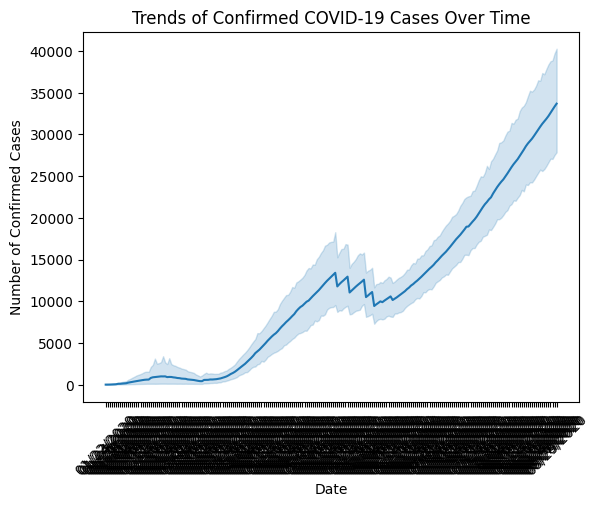

In [27]:
sns.lineplot(data=df, x='ObservationDate', y='Confirmed')
plt.title('Trends of Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.show()